In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

data = pd.read_csv("metals_train_original.csv")
print("data shape: ", data.shape)
data.head()

data shape:  (2634, 558)


,metals_daily_train.csv,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
0,20080701.0,NaN,NaN,NaN,24.72,24.85,23.77,23.80,24.66,24.72,...,16175.0,16240.0,16055.0,16165.0,16185.0,16250.0,16080.0,16145.0,2008.0,20080630.0
1,20080702.0,NaN,NaN,NaN,23.80,24.99,23.67,24.95,23.72,24.80,...,16130.0,16170.0,15910.0,16045.0,16125.0,16180.0,15880.0,16020.0,2008.0,20080630.0
2,20080703.0,NaN,NaN,NaN,24.80,25.25,24.49,24.69,24.65,25.06,...,15825.0,15960.0,15470.0,15650.0,15900.0,15950.0,15385.0,15640.0,2008.0,20080630.0
3,20080704.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15060.0,15260.0,15060.0,15175.0,15055.0,15250.0,15055.0,15155.0,2008.0,20080630.0
4,20080707.0,NaN,NaN,NaN,24.30,25.30,24.19,24.78,24.33,25.10,...,15100.0,15255.0,15100.0,15190.0,15010.0,15240.0,15010.0,15165.0,2009.0,20080707.0


In [31]:
data.isna().sum()

metals_daily_train.csv      1
p0                        274
p1                        274
p2                        274
f000_open                 145
f000_high                 145
f000_low                  145
f000_settle               145
f001_open                 145
f001_high                 145
f001_low                  145
f001_settle               145
f002_open                 143
f002_high                 143
f002_low                  143
f002_settle               143
f003_open                 150
f003_high                 150
f003_low                  150
f003_settle               150
f004_open                 150
f004_high                 150
f004_low                  150
f004_settle               150
f005_open                 145
f005_high                 145
f005_low                  145
f005_settle               145
f006_open                 145
f006_high                 145
                         ... 
f131_open                 229
f131_high                 229
f131_low  

In [32]:
def float2date(x):
    x = float(x)
    date = str(x).split(".")[0]
    assert(len(date) == 8)
    
    year = int(date[0:4])
    month = int(date[4:6])
    day = int(date[6:8])
    return pd.datetime(year, month, day)

In [33]:
df = data.dropna()
df["metals_daily_train.csv"] = df["metals_daily_train.csv"].map(float2date)
df["week_date"] = df["week_date"].map(float2date)
df = df.rename(index=str, columns={"metals_daily_train.csv": "date"})
df = df.set_index("date")
df.head()

c:\users\louis\documents\python_virtual_env\data-x\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\louis\documents\python_virtual_env\data-x\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,p0,p1,p2,f000_open,f000_high,f000_low,f000_settle,f001_open,f001_high,f001_low,...,f136_open,f136_high,f136_low,f136_settle,f137_open,f137_high,f137_low,f137_settle,week,week_date
date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,444.511058,457.032497,457.032497,53.08,56.33,52.62,56.29,49.11,52.15,48.62,...,9420.0,9680.0,9315.0,9540.0,9520.0,9800.0,9495.0,9650.0,2030.0,2008-12-01
2008-12-02,446.908899,465.530103,459.323035,55.99,56.29,54.68,55.30,51.80,52.24,51.04,...,9480.0,9600.0,9430.0,9510.0,9640.0,9730.0,9560.0,9630.0,2030.0,2008-12-01
2008-12-03,453.484820,482.060575,459.696940,56.50,56.72,54.65,55.21,53.01,53.02,51.21,...,9495.0,9580.0,9400.0,9500.0,9530.0,9690.0,9505.0,9590.0,2030.0,2008-12-01
2008-12-04,447.532919,472.395859,459.964389,55.50,57.81,54.88,57.62,51.75,54.42,51.60,...,9485.0,9485.0,9120.0,9145.0,9400.0,9445.0,9205.0,9225.0,2030.0,2008-12-01
2008-12-05,447.084228,471.922241,459.503235,58.50,60.00,56.63,56.75,54.70,56.18,53.45,...,8710.0,9000.0,8595.0,8665.0,8885.0,8940.0,8670.0,8715.0,2030.0,2008-12-01


In [34]:
def get_week_data(df, week_date):
    return df[df["week_date"] == week_date]

def get_n_next_weeks(weeks, week_index, n):
    if week_index + n >= len(weeks):
        return None
    for i in range(1, n + 1):
        if  weeks[week_index + i] - weeks[week_index] != np.timedelta64(7 * i, 'D'):
            return None
    
    return [weeks[week_index + i] for i in range(1, n + 1)]

def get_n_previous_weeks(weeks, week_index, n):
    if week_index - n < 0:
        return None
    for i in range(1, n + 1):
        if  weeks[week_index] - weeks[week_index - i] != np.timedelta64(7 * i, 'D'):
            return None
    
    return [weeks[week_index - i] for i in range(1, n + 1)]


def pre_process_data(df, N_previous_weeks):
    features, list_labels = [], [[] for _ in range(10)]
    weeks = pd.unique(df["week_date"])
    for week_index in range(len(weeks)):
        week = weeks[week_index]
        future_weeks = get_n_next_weeks(weeks, week_index, 10)
        previous_weeks = get_n_previous_weeks(weeks, week_index, N_previous_weeks)
        
        # If any data is None, skip the example
        if future_weeks is None or previous_weeks is None:
            continue
        
        # If we managed to get here, we found the 10 next weeks and the N_previous_weeks previous weeks
        present_and_past_weeks = [week] + previous_weeks
        present_and_past_week_data = []
        for week in present_and_past_weeks:
            week_data = get_week_data(df, week)
            if len(week_data) != 5:
                break
            present_and_past_week_data.append(week_data.drop(columns = ["p0", "week_date"]).values)
        else:
            # If we managed to get here, then it means we have no data missing, so we can create
            # a new input in our dataframe
            ex_features = []
            ex_features = np.concatenate(present_and_past_week_data).reshape(-1)

            future_weeks_data = [get_week_data(df, future_week) for future_week in future_weeks]
            list_ex_labels = [np.mean(future_week_data["p0"]) for future_week_data in future_weeks_data]

            features.append(ex_features)
            for index, ex_label in enumerate(list_ex_labels):
                if pd.isna(ex_label):
                    print(list_future_weeks_data)
                list_labels[index].append(ex_label)
            
    return np.array(features), [np.array(labels) for labels in list_labels]


In [35]:
features, list_labels = pre_process_data(df, 0)
print(np.shape(features))
print(np.shape(list_labels))

(220, 2775)
(10, 220)


In [36]:
from sklearn.decomposition import PCA

# Create train and test data
indices = np.linspace(0, len(features)-2, len(features), dtype=int) # -2 to not take the last example into account
np.random.shuffle(indices)
X_train, X_test = features[indices[:int(len(features)*0.8)]], features[indices[int(len(features)*0.8):]]
list_y_train = [labels[indices[:int(len(features)*0.8)]] for labels in list_labels]
list_y_test = [labels[indices[int(len(features)*0.8):]] for labels in list_labels]

# Fit PCA on train and apply it to train and test
pca = PCA(n_components=50)
pca.fit(X_train)
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train 10 Linear Regression models
regression_models = [LinearRegression() for _ in range(10)]
for index, (model, y_train, y_test) in enumerate(zip(regression_models, list_y_train, list_y_test)):
    model.fit(X_train_PCA, y_train)
    print("************ predict week {} ***************".format(index+1))
    print("train score: ", model.score(X_train_PCA, y_train))
    print("test score: ", model.score(X_test_PCA, y_test))
    print("train rmse: ", np.sqrt(mean_squared_error(y_train, model.predict(X_train_PCA))))
    print("test rmse: ", np.sqrt(mean_squared_error(y_test, model.predict(X_test_PCA))))
    print()

************ predict week 1 ***************
train score:  0.9612950047346416
test score:  0.9169421154063643
train rmse:  18.876831853909938
test rmse:  24.618814135404584

************ predict week 2 ***************
train score:  0.9634902870622476
test score:  0.869040252820828
train rmse:  18.54788118566923
test rmse:  30.514939317442277

************ predict week 3 ***************
train score:  0.9655753146143613
test score:  0.8457628571688477
train rmse:  18.20032722181306
test rmse:  34.21512442497662

************ predict week 4 ***************
train score:  0.9621099395438295
test score:  0.8298469815903038
train rmse:  19.502974444183543
test rmse:  34.608307645129116

************ predict week 5 ***************
train score:  0.9584570716227692
test score:  0.8060681030836517
train rmse:  20.506656046522032
test rmse:  37.14520345357886

************ predict week 6 ***************
train score:  0.9454403694090628
test score:  0.7621565175248914
train rmse:  23.45230006287052


In [38]:
from sklearn.ensemble import RandomForestRegressor

# Train 10 Random Forest Regressor models
forest_models = [RandomForestRegressor(n_estimators=50) for _ in range(10)]
for index, (model, y_train, y_test) in enumerate(zip(forest_models, list_y_train, list_y_test)):
    model.fit(X_train_PCA, y_train)
    print("************ predict week {} ***************".format(index+1))
    print("train score: ", model.score(X_train_PCA, y_train))
    print("test score: ", model.score(X_test_PCA, y_test))
    print("train rmse: ", np.sqrt(mean_squared_error(y_train, model.predict(X_train_PCA))))
    print("test rmse: ", np.sqrt(mean_squared_error(y_test, model.predict(X_test_PCA))))
    print()

************ predict week 1 ***************
train score:  0.9851584721237917
test score:  0.8828803387076921
train rmse:  11.689203086760374
test rmse:  29.2342260322322

************ predict week 2 ***************
train score:  0.9864345309601525
test score:  0.8759134977825738
train rmse:  11.305961529198408
test rmse:  29.703379777949877

************ predict week 3 ***************
train score:  0.9872163630602904
test score:  0.8633516714184954
train rmse:  11.0910182592701
test rmse:  32.20518512008309

************ predict week 4 ***************
train score:  0.9855316631967403
test score:  0.8885752743591434
train rmse:  12.051677667193001
test rmse:  28.006015226657965

************ predict week 5 ***************
train score:  0.9860001598082977
test score:  0.8732232179754297
train rmse:  11.904408816871987
test rmse:  30.03294914056239

************ predict week 6 ***************
train score:  0.9845044647305654
test score:  0.8162146560072653
train rmse:  12.498359804102687


<h2> Visualization </h2>

In [39]:
x, y = [features[-1]], [labels[-1] for labels in list_labels]
pca_x = pca.transform(x)

In [40]:
def get_all_weekly_data(df):
    p0_means = []
    weeks = pd.unique(df["week_date"])
    for week in weeks:
        week_data = get_week_data(df, week)
        p0_means.append(np.mean(week_data["p0"]))
    return p0_means
        
week_datas = get_all_weekly_data(df)

<h3> Linear Regression </h3>

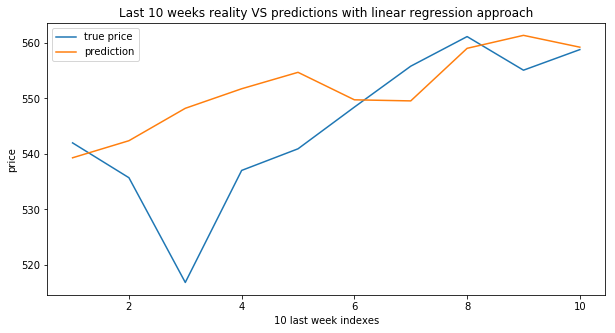

In [41]:
y_hat = []
for model in regression_models:
    y_hat.append(model.predict(pca_x)[0])

plt.figure(figsize=(10,5))
plt.plot(np.arange(1, len(y) + 1), y, label="true price")
plt.plot(np.arange(1, len(y) + 1), y_hat, label="prediction")
plt.title("Last 10 weeks reality VS predictions with linear regression approach")
plt.ylabel("price")
plt.xlabel("10 last week indexes")
plt.legend()
plt.savefig(os.getcwd() + "\\figures\\linear_approach.png")

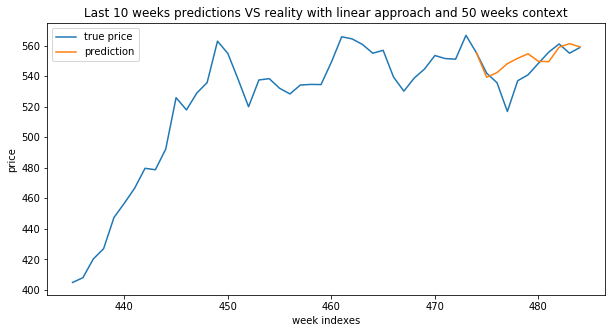

In [44]:
y_hat = []
for model in regression_models:
    y_hat.append(model.predict(pca_x)[0])

indices = np.arange(0, len(week_datas))

plt.figure(figsize=(10,5))
plt.plot(indices[-50:], week_datas[-50:], label="true price")
plt.plot(indices[-11:], [week_datas[-11]] + y_hat, label="prediction")
plt.title("Last 10 weeks predictions VS reality with linear approach and 50 weeks context")
plt.ylabel("price")
plt.xlabel("week indexes")
plt.legend()
plt.savefig(os.getcwd() + "\\figures\\50_linear_approach.png")

<h3> Random Forest </h3>

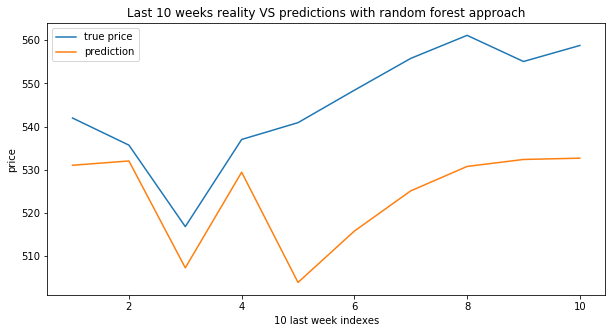

In [45]:
y_hat = []
for model in forest_models:
    y_hat.append(model.predict(pca_x)[0])

plt.figure(figsize=(10,5))
plt.plot(np.arange(1, len(y) + 1), y, label="true price")
plt.plot(np.arange(1, len(y) + 1), y_hat, label="prediction")
plt.title("Last 10 weeks reality VS predictions with random forest approach")
plt.ylabel("price")
plt.xlabel("10 last week indexes")
plt.legend()
plt.savefig(os.getcwd() + "\\figures\\forest_approach.png")

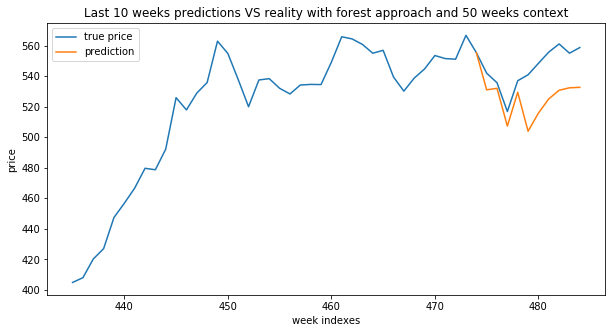

In [46]:
y_hat = []
for model in forest_models:
    y_hat.append(model.predict(pca_x)[0])

indices = np.arange(0, len(week_datas))

plt.figure(figsize=(10,5))
plt.plot(indices[-50:], week_datas[-50:], label="true price")
plt.plot(indices[-11:], [week_datas[-11]] + y_hat, label="prediction")
plt.title("Last 10 weeks predictions VS reality with forest approach and 50 weeks context")
plt.ylabel("price")
plt.xlabel("week indexes")
plt.legend()
plt.savefig(os.getcwd() + "\\figures\\50_forest_approach.png")